In [13]:
from plotnine import *
import pandas
from solarized import *
import tikzplotlib
pandas.options.display.max_rows=10

In [14]:
# 1.{5end_to_end} tpch 1,2,3,4,5 with scale 1, 10
# 2 {5module4} and 3. module4 | also {5module4mem} and {5module4net}
# 3.{5tpchmodin} tpch 1, 4, 5 with modin on scale 10
# 4.{5micro_scales} micros with scale 1, 10 | also {5micro_traffic}
# 5.{5micro_net} micro join, selection with net=wan and scale 1

In [15]:
factors= ['wflow', 'optimizer', 'net', 'scale']
df=pandas.read_feather('specific-reports/5tpchmodin.feather')
print(df['optimizer'].value_counts())
df.columns

modin    8543
Name: optimizer, dtype: int64


Index(['bytes_memory', 'cpu_percent', 'bytes_sent', 'bytes_recv',
       'snapshot_idx', 'proc_time', 'exitcode', 'db_time', 'shared_wall_time',
       'wflow', 'optimizer', 'scale', 'net'],
      dtype='object')

In [16]:
df2 = pandas.read_feather('specific-reports/5end_to_end.feather')
print(df2['optimizer'].value_counts())
df2.columns

base         46395
optimized      663
Name: optimizer, dtype: int64


Index(['bytes_memory', 'cpu_percent', 'bytes_sent', 'bytes_recv',
       'snapshot_idx', 'proc_time', 'exitcode', 'db_time', 'shared_wall_time',
       'wflow', 'optimizer', 'scale', 'net'],
      dtype='object')

In [17]:
df2 = df2[df2['wflow'].isin(['tpch1.py', 'tpch4.py', 'tpch5.py'])]
df2 = df2.query("""scale == 10""")
len(df2)

31530

In [18]:
df = df.append(df2)
print(df["optimizer"].value_counts())
print(df.columns)

base         31167
modin         8543
optimized      363
Name: optimizer, dtype: int64
Index(['bytes_memory', 'cpu_percent', 'bytes_sent', 'bytes_recv',
       'snapshot_idx', 'proc_time', 'exitcode', 'db_time', 'shared_wall_time',
       'wflow', 'optimizer', 'scale', 'net'],
      dtype='object')


# CHECK

In [19]:
df['exitcode'].value_counts()

0    40073
Name: exitcode, dtype: int64

In [20]:
df.query("exitcode == 1")['wflow'].unique()

array([], dtype=object)

# PREPROCESS

In [21]:
overview = df.groupby(by=factors).first().reset_index()
overview = overview[["wflow", "optimizer", "shared_wall_time"]]

In [23]:
plot_df = overview

# {5tpchmodin}

In [32]:
plot = (
        ggplot(plot_df, aes('wflow', y='shared_wall_time', fill='optimizer'))
        + geom_col(width = 0.5, position = "dodge")
        #+ scale_fill_manual(values=cdict) 
        + scale_y_sqrt()
        + labs(fill="Optimization Method")
       # + facet_wrap('~ scale', scales='free_y', nrow=1, dir='v')
        + xlab("Query")
        + ylab("Time (in sec.)")
       # + theme(figure_size=(8, 2))
               #subplots_adjust={'hspace': 1, 'wspace': 0.25})
        + theme(figure_size=(4, 2), subplots_adjust={'wspace': 0.20})
    )

E:\ssdapps\anaconda\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 2 in image.
E:\ssdapps\anaconda\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: specific-plots/5end_to_end.png
E:\ssdapps\anaconda\lib\site-packages\tikzplotlib\_save.py:390: UserWarning: tikzplotlib: Don't know how to handle object <class 'matplotlib.offsetbox.AnchoredOffsetbox'>.


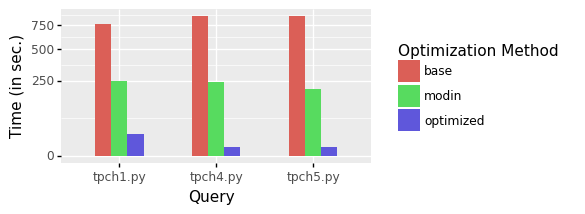

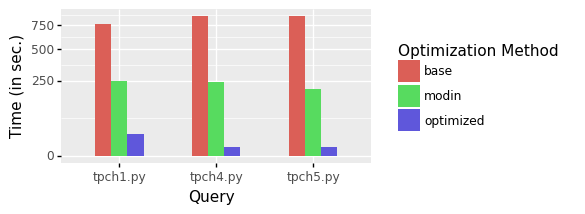

<ggplot: (135368941111)>

In [33]:
plot.save("specific-plots/5end_to_end.png")
matplot = plot.draw()
tikzplotlib.save('specific-plots/5end_to_end.tikz', figure=matplot)
display(plot)